In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 导入Tensorflow相关模块
import tensorflow.keras.datasets as datasets
import tensorflow.keras.layers as layers
import tensorflow.keras as keras

# 04. TensorFlow基础
`TensorFlow`是一个面向深度学习算法的科学计算库，内部数据保存在`张量`(Tensor)对象上，所有的运算操作(Operation，简称OP)也都是基于张量对象进行的。复杂的神经网络算法本质上就是各种张量相乘、相加等基本运算操作的组合，在深入学习深度学习算法之前，熟练掌握`TensorFlow`张量的基础操作方法十分重要。

## 4.1 数据类型

### 4.1.1 数值类型
数值类型的张量是 TensorFlow 的主要数据载体，根据维度数来区分，可分为：
+ **标量**(Scalar)：单个的实数，如1.2, 3.4等，维度(Dimension)数为0，`shape`为$[]$
+ **向量**(Vector)：$n$个实数的有序集合，通过中括号包裹，如`[1.2]`，`[1.2,3.4]`等，维度数为1，长度不定，`shape`为$[n]$
+ **矩阵**(Matrix)：$n$行$m$列实数的有序集合，如`[[1,2],[3,4]]`，维度数为2，每个维度上的长度不定，`shape`为$[n,m]$
+ **张量**(Tensor)：所有维度数$dim > 2$的数组统称为张量。张量的每个维度也作`轴`(Axis)，一般维度代表了具体的物理含义，比如`Shape`为$[2,32,32,3]$的张量共有4维，如果表示图片数据的话，每个维度/轴代表的含义分别是图片数量、图片高度、图片宽度、图片通道数，其中2代表了2张图片，32代表了高、宽也是为32，3代表了`RGB`共3个通道。张量的维度数以及每个维度所代表的具体物理含义需要由用户自行定义

In [2]:
a = 1.2 # python 语言方式创建标量
# 如果要使用TF提供的功能函数，须通过TF规定的方式去创建张量，
# 而不能使用Python语言的标准变量创建方式
aa = tf.constant(1.2)
type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

与标量不同，向量的定义须通过`List`容器传给`tf.constant()`函数：

In [3]:
a = tf.constant([1, 2.3, 4.]) # 创建一个元素的向量
a

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2.3, 4. ], dtype=float32)>

同样的方法，定义矩阵的实现如下：

In [4]:
a = tf.constant([[1,2],[3,4]])
a

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

### 4.1.2 字符串类型
除了丰富的数值类型张量外，`TensorFlow`还支持字符串类型的数据。在`tf.strings`模块中，提供了常见的字符串类型的工具函数，如小写化`lower()`、拼接`join()`、长度`length()`、切分`split()`等。

In [5]:
a = tf.constant('Hello, Deep Learning.')
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

### 4.1.3 布尔类型
为了方便表达比较运算操作的结果，`TensorFlow`还支持布尔类型的张量。布尔类型的张量只需要传入`Python`语言的布尔类型数据，转换成`TensorFlow`内部布尔型即可。

需要注意的是，`TensorFlow`的布尔类型和`Python`语言的布尔类型并不等价，不能通用。

In [6]:
a = tf.constant(True)
a, a is True, a == True #仅数值比较

(<tf.Tensor: shape=(), dtype=bool, numpy=True>,
 False,
 <tf.Tensor: shape=(), dtype=bool, numpy=True>)

## 4.2 数值精度
对于数值类型的张量，可以保存为不同字节长度的精度。常用的精度类型有`tf.int16`、`tf.int32`、`tf.int64`、`tf.float16`、`tf.float32`、`tf.float64`等，其中`tf.float64`即为`tf.double`。

In [7]:
pi_32 = tf.constant(np.pi, dtype=tf.float32)
pi_64 = tf.constant(np.pi, dtype=tf.float64)
pi_32, pi_64

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>)

对于大部分深度学习算法，一般使用`tf.int32`和`tf.float32`可满足大部分场合的运算精度要求，部分对精度要求较高的算法，如强化学习某些算法，可以选择使用`tf.int64`和`tf.float64`精度保存张量。

### 4.2.1 读取精度
通过访问张量的`dtype`成员属性可以判断张量的保存精度。

### 4.2.2 类型转换
系统的每个模块使用的数据类型、数值精度可能各不相同，对于不符合要求的张量的类型及精度，需要通过`tf.cast`函数进行转换：

In [8]:
pi_16 = tf.constant(np.pi, dtype=tf.float16)
pi_64 = tf.cast(pi_16, tf.double)
pi_16, pi_64

(<tf.Tensor: shape=(), dtype=float16, numpy=3.14>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.140625>)

## 4.3 待优化张量
为了区分需要计算梯度信息的张量与不需要计算梯度信息的张量，`TensorFlow`增加了一种专门的数据类型来支持梯度信息的记录：`tf.Variable`。

`tf.Variable`类型在普通的张量类型基础上添加了`name`、`trainable`等属性来支持计算图的构建。由于梯度运算会消耗大量的计算资源，而且会自动更新相关参数，对于不需要的优化的张量，如神经网络的输入$X$，不需要通过`tf.Variable`封装；相反，对于需要计算梯度并优化的张量，如神经网络层的$W$和$b$，需要通过`tf.Variable`包裹以便`TensorFlow`跟踪相关梯度信息。

通过`tf.Variable()`函数可以将普通张量转换为待优化张量，例如：

In [9]:
a = tf.constant([-1, 0, 1, 2])
aa = tf.Variable(a)
aa.name, aa.trainable

('Variable:0', True)

`name`和`trainable`属性是`Variable`特有的属性，`name`属性用于命名计算图中的变量，这套命名体系是`TensorFlow`内部维护的，一般不需要用户关注；`trainable`属性表征当前张量是否需要被优化，创建`Variable`对象时是默认启用优化标志，可以设置`trainable=False`来设置张量不需要优化。

待优化张量可视为普通张量的特殊类型，普通张量其实也可以通过`GradientTape.watch()`方法临时加入跟踪梯度信息的列表，从而支持自动求导功能。

除了通过普通张量方式创建`Variable`，也可以直接创建：

In [10]:
a = tf.Variable([[1,2],[3,4]])
a.name, a.trainable

('Variable:0', True)

## 4.4 创建张量
在`TensorFlow`中，可以通过多种方式创建张量。

### 4.4.1 从数组、列表对象创建
通过`tf.convert_to_tensor`函数可以创建新`Tensor`，并将保存在`Python`列表对象或者`Numpy`数组对象中的数据导入到新`Tensor`中，例如：

In [11]:
a = tf.convert_to_tensor([1,2.])
b = tf.convert_to_tensor(np.array([[1,2.],[3,4]]))
a, b

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float64, numpy=
 array([[1., 2.],
        [3., 4.]])>)

> **注意**
> Numpy浮点数数组默认使用64位精度保存数据，转换到`Tensor`类型时精度为`tf.float64`，可以在需要的时候将其转换为`tf.float32`类型

`tf.constant()`和`tf.convert_to_tensor()`都能够自动的把`Numpy`数组或者`Python`列表数据类型转化为`Tensor`类型，这两个API命名来自`TensorFlow 1.x`的命名习惯，在`TensorFlow 2`中函数的名字并不是很贴切，使用其一即可。

### 4.4.2 创建全0或全1张量
将张量创建为全0或者全1数据是非常常见的张量初始化手段。

In [12]:
tf.zeros([]),tf.ones([])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [13]:
tf.zeros([1]),tf.ones([1])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

In [14]:
tf.zeros([2,2]),tf.ones([2,2])

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0., 0.],
        [0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>)

通过`tf.zeros_like`，`tf.ones_like`可以方便地新建与某个张量`shape`一致，且内容为全0或全1的张量。

### 4.4.3 创建自定义数值张量
除了初始化为全0或全1的张量之外，有时也需要全部初始化为某个自定义数值的张量。

通过`tf.fill(shape, value)`可以创建全为自定义数值`value`的张量，形状由`shape`参数指定：

In [15]:
tf.fill([2,2], 99)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]], dtype=int32)>

### 4.4.4 创建已知分布的张量
正态分布(Normal Distribution，或Gaussian Distribution)和均匀分布(Uniform Distribution)是最常见的分布之一，创建采样自这2种分布的张量非常有用，比如在卷积神经网络中，卷积核张量$W$初始化为正态分布有利于网络的训练；在对抗生成网络中，隐藏变量$z$一般采样自均匀分布。

通过`tf.random.normal(shape, mean=0.0, stddev=1.0)`可以创建形状为`shape`、均值为`mean`、标准差为`stddev`的正态分布：

In [16]:
tf.random.normal([2,2], mean=1,stddev=2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.5458537, 3.7866337],
       [2.8747766, 2.3216863]], dtype=float32)>

通过`tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)`可以创建采样自$[\mathrm{minval}, \mathrm{maxval})$区间的均匀分布的张量：

In [17]:
tf.random.uniform([2,2], maxval=10)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8.20524  , 5.618274 ],
       [4.3096056, 1.7808759]], dtype=float32)>

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值`maxval`参数，同时指定数据类型为`tf.int*`型：

In [18]:
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, 31],
       [63,  1]], dtype=int32)>

### 4.4.5 创建序列
可以通过`tf.range()`函数创建一段连续的整型序列：

In [19]:
tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [20]:
tf.range(10, delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8], dtype=int32)>

In [21]:
tf.range(10, 20, delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([10, 12, 14, 16, 18], dtype=int32)>

## 4.5 张量的典型应用
本节介绍每种维度数下张量的典型应用，让读者在看到每种张量时，能够直观地联想到它主要的物理意义和用途，对后续张量的维度变换等一系列抽象操作的学习打下基础。

### 4.5.1 标量
标量就是一个简单的数字，维度数为0，`shape`为$[]$。标量的一些典型用途是误差值的表示、各种测量指标的表示，比如准确度(Accuracy)、精度(Precision)和召回率(Recall)等。

以均方差误差函数为例，经过`tf.keras.losses.mse`(或`tf.keras.losses.MSE`，两者相同功能)返回每个样本上的误差值，最后取误差的均值作为当前`Batch`的误差，它是一个标量：

In [22]:
out = tf.random.uniform([4,10]) #随机模拟网络输出
y = tf.constant([2,3,2,0]) # 随机构造样本真实标签
y = tf.one_hot(y, depth=10) # one-hot 编码

loss = tf.keras.losses.mse(y, out) # 计算每个样本的 MSE
loss = tf.reduce_mean(loss)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.29233792>

### 4.5.2 向量
向量是一种非常常见的数据载体，如在全连接层和卷积神经网络层中，偏置张量$b$就使用向量来表示。如`图4.2`所示，每个全连接层的输出节点都添加了一个偏置值，把所有输出节点的偏置表示成向量形式：$b = [b_1, b_2]^T$。

<img src="images/04_02.png" style="width:350px;"/>

In [23]:
# z=wx,模拟获得激活函数的输入z
z = tf.random.normal([4,2])
b = tf.zeros([2])
z = z + b
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.47742736, -0.14441332],
       [ 1.5571787 ,  1.2649426 ],
       [ 0.13402967, -1.9965774 ],
       [-1.3444796 , -2.251197  ]], dtype=float32)>

通过高层接口类`Dense()`方式创建的网络层，张量$W$和$b$存储在类的内部，由类自动创建并管理。可以通过全连接层的`bias`成员变量查看偏置变量$b$，例如创建输入节点数为4，输出节点数为3的线性层网络，那么它的偏置向量$b$的长度应为3：

In [24]:
# 创建一层`Wx+b`，输出节点为3
fc = layers.Dense(3) 
# 通过build函数创建`W,b`张量，输入节点为4
fc.build(input_shape=(2,4))
fc.bias # 查看偏置向量

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

可以看到，类的偏置成员`bias`为长度为3的向量，初始化为全0，这也是偏置$b$的默认初始化方案。同时偏置向量$b$的类型为`Variable`，这是因为$W$和$b$都是待优化参数。

### 4.5.3 矩阵
矩阵也是非常常见的张量类型，比如全连接层的批量输入张量$X$的形状为$[b, d_{in}]$，其中$b$表示输入样本的个数，即`Batch Size`，$d_{in}$表示输入特征的长度。例如特征长度为4，一共包含2个样本的输入可以表示为矩阵：

In [25]:
x = tf.random.normal([2,4])

令全连接层的输出节点数为3，则它的权值张量$W$的`shape`为$[4,3]$，我们利用张量$X$、$W$和向量$b$可以直接实现一个网络层，代码如下:

In [26]:
w = tf.ones([4,3]) #定义W张量
b = tf.zeros([3]) #定义b张量
o = x@w+b #X@W+b运算
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.1310693,  1.1310693,  1.1310693],
       [-0.9165219, -0.9165219, -0.9165219]], dtype=float32)>

其中$X$和$W$张量均是矩阵，上述代码实现了一个线性变换的网络层，激活函数为空。一般地，$\sigma(X@W + b)$网络层称为`全连接层`，在`TensorFlow`中可以通过`Dense`类直接实现，特别地，当激活函数$\sigma$为空时，全连接层也称为`线性层`。我们通过`Dense`类创建输入4个节 点，输出3个节点的网络层，并通过全连接层的`kernel`成员名查看其权值矩阵$W$：

In [27]:
fc = layers.Dense(3) #定义全连接层的输出节点为3
fc.build(input_shape=(2,4)) #定义全连接层的输入节点为4
fc.kernel # 查看权值矩阵W

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.07998121,  0.24727356, -0.08657426],
       [-0.88830286,  0.10295928,  0.5879053 ],
       [-0.69401145,  0.35744727,  0.07975996],
       [ 0.53344214,  0.26444352,  0.04773366]], dtype=float32)>

### 4.5.4 三维张量
三维的张量一个典型应用是表示序列信号，它的格式是
+ $X = [\mathrm{batch\_size}, \mathrm{sequence\_len}, \mathrm{feature\_len}]$

考虑自然语言处理中句子的表示，如评价句子的是否为正面情绪的情感分类任务网络，如`图4.3`所示。

<img src="images/04_03.png" style="width:400px;"/>

为了能够方便字符串被神经网络处理，一般将单词通过嵌入层(Embedding Layer)编码为固定长度的向量，比如`what`编码为某个长度3的向量，那么2个等长(单词数量为5)的句子序列可以表示为`shape`为$[2,5,3]$的3维张量，其中2表示句子个数，5表示单词数量，3表示单词向量的长度。

### 4.5.5 四维张量
大于四维的张量一般应用的比较少，如在元学习(Meta Learning)中会采用五维的张量表示方法，理解方法与三、四维张量类似，不再赘述。

四维张量在卷积神经网络中应用非常广泛，它用于保存`特征图`(Feature maps)数据，格式一般定义为
+ $[b,h,w,c]$

其中$b$表示输入样本的数量，$h,w$分别表示特征图的高/宽，$c$表示特征图的通道数。图片数据是特征图的一种，对于含有`RGB`的3个通道的彩色图片，每张图片包含了$h$行列像素点，每个点需要3个数值表示`RGB`通道的颜色强度，因此一张图片可以表示为$[h,w,3]$。

神经网络中一般并行计算多个输入以提高计算效率，故$b$张图片的张量可表示为$[b,h,w,3]$：

In [28]:
# 创建32x32的彩色图片输入，个数为4
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = layers.Conv2D(16,kernel_size=3)
out = layer(x) # 前向计算
out.shape # 输出大小

TensorShape([4, 30, 30, 16])

其中卷积核张量也是4维张量，可以通过`kernel`成员变量访问：

In [29]:
layer.kernel.shape

TensorShape([3, 3, 3, 16])

## 4.6 索引与切片

### 4.6.1 索引
`TensorFlow`支持基本的$[i][j]\dots$标准索引方式，也支持通过逗号分隔索引号的索引方式。假设$X$为4张$32\times 32$大小的彩色图片，`shape`为$[4,32,32,3]$：

In [30]:
x = tf.random.normal([4,32,32,3])
# 取第1张图片，第2行，第3列的数据
x[0][1][2], x[0,1,2]

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.68077874, -1.2214446 ,  2.3251214 ], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.68077874, -1.2214446 ,  2.3251214 ], dtype=float32)>)

### 4.6.2 切片
通过`start: end: step`切片方式可以方便地提取一段数据。切片的用法如下表：

<img src="images/t_04_01.png" style="width:500px;"/>

特别地，`step`可以为负数，例如，当`step=−1`时，`start: end: −1`表示从`start`开始，逆序读取至`end`结束(不包含`end`)，索引号$\mathrm{end} \le \mathrm{start}$：

In [31]:
x = tf.range(9)
x[8:0:-1]

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1], dtype=int32)>

逆序取全部元素，实现如下：

In [32]:
x[::-1]

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1, 0], dtype=int32)>

当张量的维度数量较多时，不需要采样的维度一般用单冒号`:`表示采样所有元素。考虑$[4,32,32,3]$的图片张量，当需要读取`G`通道上的数据时，前面所有维度全部提取，此时需要写为：

In [33]:
x = tf.random.normal([4,32,32,3])
# 取G通道数据
x[:,:,:,1].shape

TensorShape([4, 32, 32])

为了避免出现像$[:,:,:,1]$这样过多冒号的情况，可以使用`⋯`符号表示取多个维度上所有的数据，其中维度的数量需根据规则自动推断：当切片方式出现`⋯`符号时，`⋯`符号左边的维度将自动对齐到最左边，`⋯`符号右边的维度将自动对齐到最右边，此时系统再自动推断`⋯`符号代表的维度数量，它的切片方式总结如`表4.2`所示：

<img src="images/t_04_02.png" style="width:500px;"/>

读取第`1~2`张图片的`G/B`通道数据，实现如下：

In [34]:
# 高宽维度全部采集
x[0:2,...,1:].shape

TensorShape([2, 32, 32, 2])

读取最后2张图片，代码如下：

In [35]:
# 高、宽、通道维度全部采集，等价于x[2:]
x[2:,...].shape

TensorShape([2, 32, 32, 3])

## 4.7 维度变换
基本的维度变换操作函数包含了改变视图`reshape`、插入新维度`expand_dims`，删除维度`squeeze`、交换维度`transpose`、复制数据`tile`等函数。

### 4.7.1 改变视图
我们先来认识一下张量的`存储`(Storage)和`视图`(View)的概念：
+ 张量的视图就是我们理解张量的方式，比如`shape`为$[2,4,4,3]$的张量$A$，我 们从逻辑上可以理解为2张图片，每张图片4行4列，每个位置有`RGB`表示颜色的3个通道的数据
+ 张量的存储体现在张量在内存上保存为一段连续的内存区域

对于同样的存储，我们可以有不同的理解方式，比如上述张量$A$，我们可以在不改变张量的存储下，将张量$A$理解为2个样本，每个样本的特征为长度48的向量。同一个存储，从不同的角度观察数据，可以产生不同的视图，这就是存储与视图的关系。

改变视图操作在提供便捷性的同时，也会带来很多逻辑隐患，这主要的原因是改变视图操作的默认前提是存储不需要改变，否则改变视图操作就是非法的。

In [36]:
x=tf.range(96)
# 改变`x`的视图，获得`4D`张量，存储并未改变
x=tf.reshape(x,[2,4,4,3])
x.shape

TensorShape([2, 4, 4, 3])

### 4.7.2 增、删维度
增加一个长度为1的维度相当于给原有的数据添加一个新维度的概念，维度长度为1，故数据并不需要改变，仅仅是改变数据的理解方式，因此它其实可以理解为改变视图的一种特殊方式。

In [37]:
x = tf.constant([[0,1],[2,3]])
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]], dtype=int32)>

通过`tf.expand_dims(x, axis)`可在指定的`axis`轴前可以插入一个新的维度：

In [38]:
x = tf.expand_dims(x,axis=2)
x

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[0],
        [1]],

       [[2],
        [3]]], dtype=int32)>

可以看到，插入一个新维度后，数据的存储顺序并没有改变，仅仅是改变了数据的视图。

需要注意的是，`axis`为正时，表示在当前维度之前插入一个新维度；为负时，表示当前维度之后插入一个新的维度：

<img src="images/04_06.png" style="width:230px;"/>

删除维度是增加维度的逆操作，删除维度只能删除长度为1的维度，也不会改变张量的存储：

In [39]:
x = tf.squeeze(x, axis=2)
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]], dtype=int32)>

如果不指定维度参数`axis`，`tf.squeeze(x)`会默认删除所有长度为1的维度，例如：

In [40]:
x = tf.constant([[[0,1],[2,3]]])
x = tf.expand_dims(x,axis=3)
x

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[0],
         [1]],

        [[2],
         [3]]]], dtype=int32)>

In [41]:
x = tf.squeeze(x)
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]], dtype=int32)>

### 4.7.3 交换维度
在实现算法逻辑时，在保持维度顺序不变的条件下，仅仅改变张量的理解方式是不够的，有时需要直接调整的存储顺序，即交换维度(Transpose)。通过交换维度操作，改变了张量的存储顺序，同时也改变了张量的视图。

例如，`TensorFlow`中图片张量的默认存储格式是通道后行格式：$[b,h,w,c]$，但是`PyTorch`是通道先行格式：$[b,c,h,w]$，因此需要交换维度。`tf.transpose(x, perm)`函数完成维度交换操作，其中参数`perm`表示新维度的顺序`List`：

In [42]:
x = tf.random.normal([2,32,32,3])
x1 = tf.transpose(x,perm=[0,3,1,2])
x1.shape

TensorShape([2, 3, 32, 32])

### 4.7.4 复制数据
`tf.tile(x, multiples)`函数完成数据在指定维度上的复制操作，`multiples`指定了每个维度上面的复制倍数，对应位置为1表明不复制，为2表明新长度为原来长度的2倍，即数据复制一份，以此类推。

In [43]:
x = tf.range(4)
# 创建2行2列矩阵
x = tf.reshape(x,[2,2])
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]], dtype=int32)>

首先，在列维度复制1份数据：

In [44]:
x = tf.tile(x,multiples=[1,2])
x

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3]], dtype=int32)>

然后在行维度复制1份数据：

In [45]:
x = tf.tile(x,multiples=[2,1])
x

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]], dtype=int32)>

> **注意**
> 
> `tf.tile`会创建一个新的张量来保存复制后的张量，复制操作涉及大量数据的读写IO运算，计算代价相对较高。神经网络中不同`shape`之间的张量运算操作十分频繁，那么有没有轻量级的复制操作呢？这就是接下来要介绍的`Broadcasting`操作

## 4.8 Broadcasting
`Broadcasting`称为`广播机制`(或`自动扩展机制`)，它是一种轻量级的张量复制手段，在逻辑上扩展张量数据的形状，但是只会在需要时才会执行实际存储复制操作。对于大部分场景，`Broadcasting`机制都能通过优化手段避免实际复制数据而完成逻辑运算，从而相对于`tf.tile`函数，减少了大量计算代价。

对于所有长度为1的维度，`Broadcasting`的效果和`tf.tile`一样，都能在此维度上逻辑复制数据若干份，区别在于`tf.tile`会创建一个新的张量，执行复制IO操作，并保存复制后的张量数据，而`Broadcasting`并不会立即复制数据，它会在逻辑上改变张量的形状，使得视图上变成了复制后的形状。

`Broadcasting`会通过深度学习框架的优化手段避免实际复制数据而完成逻辑运算，至于怎么实现的用户不必关心，对于用户来说，`Broadcasting`和`tf.tile`复制的最终效果是一样的，操作对用户透明，但是`Broadcasting`机制节省了大量计算资源。

那么有了`Broadcasting`机制后，所有`shape`不一致的张量是不是都可以直接完成运算？显然，所有的运算都需要在正确逻辑下进行，`Broadcasting`机制并不会扰乱正常的计算逻辑，它只会针对于最常见的场景自动完成增加维度并复制数据的功能，提高开发效率和运行效率。这种最常见的场景是什么呢？这就要说到`Broadcasting`设计的核心思想。

`Broadcasting`机制的核心思想是普适性，即同一份数据能普遍适合于其他位置。在验证普适性之前，需要先将张量`shape`靠右对齐，然后进行普适性判断：对于长度为1的维 度，默认这个数据普遍适合于当前维度的其他位置；对于不存在的维度，则在增加新维度后默认当前数据也是普适于新维度的，从而可以扩展为更多维度数、任意长度的张量形状。

考虑`shape`为$[w,1]$的张量$A$，需要扩展为`shape`：$[b,h,w,c]$。如`图4.7`所示，第一行为欲扩展的`shape`，第二行为现有`shape`：

<img src="images/04_07.png" style="width:300px;"/>

首先将2个`shape`靠右对齐，对于通道维度$c$，张量的现长度为1，则默认此数据同样适合当前维度的其他位置，将数据在逻辑上复制$c−1$份，长度变为 $c$；对于不存在的$b$和$h$维度，则自动插入新维度，新维度长度为1，同时默认当前的数据普适于新维度的其他位置，即对于其它的图片、其它的行来说，与当前的这一行的数据完全一致。这样将数据$b$和$h$维度的长度自动扩展为$b$和$h$，如`图4.8`所示：

<img src="images/04_08.png" style="width:550px;"/>

通过`tf.broadcast_to(x, new_shape)`函数可以显式地执行自动扩展功能，将现有`shape`扩张为`new_shape`，实现如下：

In [46]:
A = tf.range(3)
A = tf.reshape(A, [3,-1])
A

<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
array([[0],
       [1],
       [2]], dtype=int32)>

In [47]:
B = tf.broadcast_to(A, [2,3,3,3])
B

<tf.Tensor: shape=(2, 3, 3, 3), dtype=int32, numpy=
array([[[[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2]],

        [[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2]],

        [[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2]]],


       [[[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2]],

        [[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2]],

        [[0, 0, 0],
         [1, 1, 1],
         [2, 2, 2]]]], dtype=int32)>

可以看到，在普适性原则的指导下，`Broadcasting`机制变得直观、好理解，它的设计是非常符合人的思维模式。

我们来考虑不满足普适性原则的例子，如`图4.9`所示：

<img src="images/04_09.png" style="width:270px;"/>

在$c$维度上，张量已经有2个特征数据，新`shape`对应维度的长度为$c$, ($c \ne 2$，如$c = 3$)，那么当前维度上的这2个特征无法普适到其它位置，故不满足普适性原则，无法应用`Broadcasting`机制，将会触发错误。

在进行张量运算时，有些运算在处理不同`shape`的张量时，会隐式地自动调用`Broadcasting`机制，如`+、-、*、/`等运算等，将参与运算的张量`Broadcasting`成一个公共`shape`，再进行相应的计算。`图4.10`演示了3种不同`shape`下的张量$A、B$相加的例子：

<img src="images/04_10.png" style="width:400px;"/>


## 4.9 数学运算

### 4.9.1 加、减、乘、除
分别通过`tf.add`、`tf.subtract`、`tf.multiply`、`tf.divide`函数实现，`TensorFlow`也重载了`+、 − 、 ∗ 、/`运算符。

整除和余除分别通过`//`和`%`运算符实现。

### 4.9.2 乘方运算
通过`tf.pow(x, a)`可以方便地完成$y = x^a$运算。

当指数为$\frac{1}{a}$时，完成$y = \sqrt[a]{x}$运算。

对于常见的平方和平方根运算，可以使用`tf.square(x)`和`tf.sqrt(x)`实现。

### 4.9.3 指数和对数运算
对于自然指数$e^x$，可以通过`tf.exp(x)`实现。

自然对数$\log{e}$可以通过`tf.math.log(x)`实现。

### 4.9.4 矩阵相乘运算
通过@运算符可以实现矩阵相乘，还可以通过`tf.matmul(a, b)`函数实现。

需要注意的是，`TensorFlow`中的矩阵相乘可以使用批量方式，也就是张量$A$和$B$的维度数可以大于2。当张量$A$和$B$的维度数大于2时，`TensorFlow`会选择$A$和$B$的最后两个维度进行矩阵相乘，前面所有的维度都视作`Batch`维度。

根据矩阵相乘的定义，$A$和$B$能够矩阵相乘的条件是，$A$的倒数第一个维度长度(列)和$B$的倒数第二个维度长度(行)必须相等：

In [48]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
c = a@b # 批量形式的矩阵相乘
c.shape

TensorShape([4, 3, 28, 2])

矩阵相乘函数同样支持自动`Broadcasting`机制：

In [49]:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
c = a@b
c.shape

TensorShape([4, 28, 16])

## 4.10 前向传播实战
本节我们将利用已经学到的知识去完成三层神经网络的实现：
+ $\mathrm{out} = \mathit{ReLU}\bigg\{\mathit{ReLU}\big\{\mathit{ReLU}[X@W_1 + b_1]@W_2 + b_2\big\}@W + b\bigg\}$

我们采用的数据集是`MNIST`手写数字图片集，输入节点数为784，第一层的输出节点数是256，第二层的输出节点数是128，第三层的输出节点是10，也就是当前样本属于10类别的概率。

完整代码如下：

In [50]:
# 加载MNIST数据集并标准化
def load_data():
    (x, y), (x_val, y_val) = datasets.mnist.load_data()
    # 转换为浮点张量， 并缩放到-1~1
    x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
    # 转换为整形张量
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    # one-hot 编码
    y = tf.one_hot(y, depth=10)
    # 改变视图， [b, 28, 28] => [b, 28*28]
    x = tf.reshape(x, (-1, 28 * 28))
    # 构建数据集对象
    train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
    # 批量训练
    train_dataset = train_dataset.batch(200)
    return train_dataset

# 初始化模型参数
def init_paramaters():
    # 每层的张量都需要被优化，故使用Variable类型，并使用截断的正太分布初始化权值张量
    # 偏置向量初始化为 0 即可
    # 第一层的参数
    w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
    b1 = tf.Variable(tf.zeros([256]))
    # 第二层的参数
    w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
    b2 = tf.Variable(tf.zeros([128]))
    # 第三层的参数
    w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))
    return w1, b1, w2, b2, w3, b3


def train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # 第一层计算， [b, 784]@[784, 256]+[256] => [b, 256]+[256] => [b,256]+[b, 256]
            h1 = x @ w1 + tf.broadcast_to(b1, (x.shape[0], 256))
            h1 = tf.nn.relu(h1)
            # 第二层计算， [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # 输出层计算， [b, 128] => [b, 10]
            out = h2 @ w3 + b3
            # 计算网络输出与标签之间的均方差，mse=mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y - out)
            # 误差标量， mean: scalar
            loss = tf.reduce_mean(loss)
            # 自动梯度，需要求梯度的张量有[w1, b1, w2, b2, w3, b3]
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # 梯度更新， assign_sub将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])
    print('epoch:', epoch, ', loss:', loss.numpy())
    return loss.numpy()


def train(epochs):
    losses = []
    train_dataset = load_data()
    w1, b1, w2, b2, w3, b3 = init_paramaters()
    for epoch in range(epochs):
        loss = train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001)
        losses.append(loss)
    return losses

训练模型：

In [51]:
epochs = 20
losses = train(epochs=epochs)

epoch: 0 , loss: 0.17441195
epoch: 1 , loss: 0.1534687
epoch: 2 , loss: 0.13826548
epoch: 3 , loss: 0.12692253
epoch: 4 , loss: 0.11815366
epoch: 5 , loss: 0.111196354
epoch: 6 , loss: 0.105570585
epoch: 7 , loss: 0.10087141
epoch: 8 , loss: 0.096876554
epoch: 9 , loss: 0.09341132
epoch: 10 , loss: 0.09034189
epoch: 11 , loss: 0.08761643
epoch: 12 , loss: 0.08518828
epoch: 13 , loss: 0.083006196
epoch: 14 , loss: 0.08102085
epoch: 15 , loss: 0.07920984
epoch: 16 , loss: 0.077544436
epoch: 17 , loss: 0.076011084
epoch: 18 , loss: 0.07459002
epoch: 19 , loss: 0.07326108


网络训练 误差值的变化曲线：

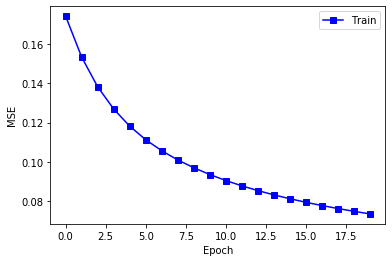

In [52]:
x = [i for i in range(0, epochs)]
plt.plot(x, losses, color='blue', marker='s', label='Train')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()